<a href="https://colab.research.google.com/github/cristobalroldan/TareaGIO/blob/main/TareaGIO_n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np 
import math

m = 100
n = 2
a = np.random.uniform(-10,10, size=(m,n))
np.around(a,2,a)
b = np.random.uniform(-10,10, m)
np.around(b,2,b)

array([ 2.43,  0.99, -9.94, -0.2 ,  6.88,  2.84,  6.97, -6.96,  0.04,
       -1.74, -0.77, -1.92,  6.51, -5.5 , -8.35, -4.97, -0.57,  3.85,
        7.83, -3.12,  3.49, -6.74, -0.84,  5.75, -2.45,  1.16,  1.62,
        3.44, -1.8 , -7.24,  4.48,  7.69,  2.18,  3.61,  8.73, -8.24,
       -0.07, -0.07, -0.13, -1.96, -0.7 ,  8.09, -2.72, -4.41,  9.56,
        4.98, -5.41, -3.01,  7.4 , -4.52, -9.08, -6.98, -5.91, -9.21,
        3.47, -3.18, -4.93, 10.  ,  0.01,  1.7 , -1.57,  4.93,  9.85,
        6.41,  4.18, -6.88,  5.41, -7.1 ,  7.56,  4.35,  2.89, -6.52,
       -5.9 , -0.53, -0.38,  6.25, -2.95,  5.7 , -8.71, -3.52, -6.31,
       -2.22, -1.83,  9.8 , -0.23, -3.02,  4.28,  0.33, -0.17,  6.  ,
       -4.49,  1.39, -4.65, -2.73,  1.92,  3.18, -0.59,  2.17,  7.83,
       -2.96])

In [175]:
#x = np.random.randint(1,20, n)
x=[1,1] # x fijo
print(x)

[1, 1]


In [176]:
def f(x): 
    i = 1
    totalsum = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = np.float128(((a[i-1][j-1])*x[j-1]) + b[i-1])
            totalexp = np.float128(totalexp) + np.float128(aux)
            j = j + 1
        aux2 = np.float128(np.exp(np.float128(totalexp)))
        #print(aux)
        totalsum = np.float128(totalsum + aux2)
        #print(totalsum)
        i = i + 1
    return np.log(np.float64(totalsum)) # retorna float 64 bits
f(x)


29.206584857554553

In [177]:
def fsinLog(x): 
    i = 1
    totalsum = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = np.float128(((a[i-1][j-1])*x[j-1]) + b[i-1])
            totalexp = np.float128(totalexp + aux)
            j = j + 1
        aux2 = np.exp(np.float128(totalexp))
        #print(aux)
        totalsum = np.float128(totalsum + aux2)
        #print(totalsum)
        i = i + 1
    return np.float128(totalsum)
fsinLog(x)

4833465676005.156962

In [178]:
def fdx(x):
    # print(x)
    i = 1
    totalsum = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = np.float128(a[i-1][j-1]*x[j-1] + b[i-1])
          totalexp = np.float128(totalexp) + np.float128(aux)
          j = j+1
        aux2 = np.float128(np.exp(np.float128(totalexp))*a.item(i-1,0))
        #print(aux2)
        totalsum = np.float128(totalsum) + np.float128(aux2)
        # print(totalsum)
        i = i + 1
    
    i = 1
    totalsum2 = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = np.float128(a[i-1][j-1]*x[j-1] + b[i-1])
          totalexp = np.float128(totalexp) + np.float128(aux)
          j = j +1
        aux2 = np.float128(np.exp(np.float128(totalexp))*a.item(i-1,1))
        #print(aux2)

        totalsum2 = np.float128(totalsum2) + np.float128(aux2)
        # print(totalsum)
        i = i + 1

    return np.array([(1/fsinLog(x))*totalsum, (1/fsinLog(x))*totalsum2], dtype=np.float64) #retorna float64

print(fdx(x))

[7.57841727 8.5169615 ]


In [179]:
def backtrack4(x0, f, fdx, t = 1, alpha = 0.2, beta = 0.3):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    it=0
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * (np.dot(np.transpose(fdx(point)), -1*fdx(point))):
         t *= beta
         #print(f(point - np.dot(t,fdx(point))),f(point) + alpha * t * (np.dot(np.transpose(fdx(point)), -1*fdx(point))),it)
         it=it+1
    return t

backtrack4([0.1,0.1], f, fdx)

0.027

In [180]:
# def backtrack5(x0, f, deltax, t = 1, alpha = 0.4, beta = 0.9):
    
#     point = x0 #Necessary to ensure matrix form
#     #print(point)
#     #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
#     while f(point - np.dot(t,deltax)) > f(point) + alpha * t * (np.dot(np.transpose(deltax), -1*deltax)):
#          t = t*beta
#         #  print(t)
#     return t

# backtrack5(x, f,fdx)

In [181]:
#@title
def grad(x0, max_iter):
    iter = 1
    
    while (np.linalg.norm(np.array(fdx(x0))) > 0.0001):
    #Find stepsize by backtracking
        t = backtrack4(x0, f, fdx) #Step Size
        x0 = x0 - np.dot(t, np.transpose(fdx(x0)))
        #Calculate New Value of Function
        print(x0, f(x0), fdx(x0),t, iter)
        iter += 1
        if iter > max_iter:
            break
    return x0, f(x0), iter

grad(x, 100)

[0.31794245 0.23347346] 21.158072559988895 [0.84008446 1.13834801] 0.09 1
[0.24233484 0.13102214] 21.033254319593116 [0.39150153 0.39277512] 0.09 2
[0.20709971 0.09567238] 21.01346261486908 [0.24028082 0.09831031] 0.09 3
[0.18547443 0.08682446] 21.00906017527279 [0.08702672 0.09896451] 0.09 4
[0.17764203 0.07791765] 21.00795226476616 [0.07009394 0.01142018] 0.09 5
[0.17133357 0.07688983] 21.007654924809344 [0.01614589 0.03782841] 0.09 6
[0.16988044 0.07348528] 21.00757177967718 [ 0.02551927 -0.00690279] 0.09 7
[0.16758371 0.07410653] 21.007547394852 [-0.00099379  0.01907037] 0.09 8
[0.16767315 0.07239019] 21.007539489616036 [ 0.0118139  -0.00935358] 0.09 9
[0.16735418 0.07264274] 21.007534932811673 [ 0.00696653 -0.00301507] 0.027 10
[0.16672719 0.0729141 ] 21.007533432773698 [-0.00099078  0.00576418] 0.09 11
[0.16675394 0.07275846] 21.00753273802927 [0.00035377 0.00305379] 0.027 12
[0.1667221  0.07248362] 21.007532444465525 [ 0.00196519 -0.00118749] 0.09 13
[0.16654523 0.0725905 ] 21.0

(array([0.16650606, 0.07246904]), 21.007532242652164, 22)

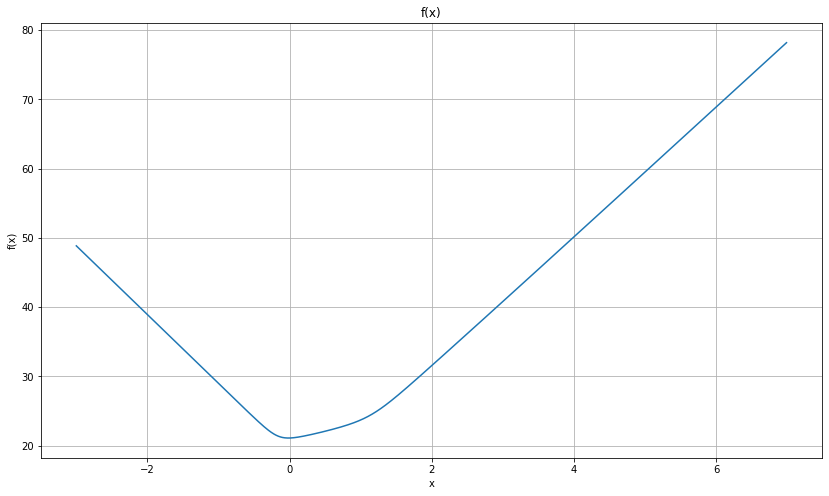

por evaluaciónes: 21.112934595883925
por optimización: 21.115253529478966


In [182]:
import matplotlib.pyplot as plt

x00= np.arange(-3, 7, 0.01)
#print(x0)
y=[]
for i in x00:
    y.append(f([-0.019501,i]))
    #print(f([0.1,i]))

plt.figure(figsize=(14,8))
plt.plot(x00,y,'')
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.axis([0, 2450, 0, 45])
plt.grid(True)
plt.title('f(x)')
# [xmin, xmax, ymin, ymax] 
plt.show()
print("por evaluaciónes: "+str(min(y)))
print("por optimización: "+str(f([-0.019501 , -0.0005068])))

In [183]:
def Hessian(x0,fdx): # (punto actual, primera derivada)
  dt=1e-4
  dxdx=( fdx( [x0[0]+dt, x0[1]] )[0] - fdx(x0)[0] ) / dt
  dxdy=( fdx( [ x0[0]+dt , x0[1] ] )[1] - fdx(x0)[1] ) / dt
  dydx=( fdx( [ x0[0] , x0[1]+dt ] )[0] - fdx(x0)[0] ) / dt
  dydy=( fdx( [ x0[0] , x0[1]+dt ] )[1] - fdx(x0)[1] ) / dt
  return[[dxdx,dxdy],[dydx,dydy]]

In [184]:
def backtrack5(x0, f, fdx, t = 1, alpha = 0.05, beta = 0.2):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,-fdx)) > f(point) + alpha * t * (np.dot(np.transpose(-fdx), 1*fdx)):
      t *= beta
      #print(f(point - np.dot(t,fdx)))
    return t

In [185]:

import numpy.linalg as npla
##################################################
x=[1,1]  #Método de newton siempre parte de [1,1]
######################################################

def lambda_sq(fdx, Hessian, point):
    lambda_sq1 = np.dot(fdx(point).T, np.dot(npla.pinv( Hessian(point,fdx) ) , fdx(point)  )) 
    return lambda_sq1.item() 
     
def delta_x(fdx, Hessian, point):
    delta_x =- np.dot(npla.pinv(Hessian(point,fdx)) , fdx(point))
    return np.array(delta_x)

#eps is the tolerance condition to exit out of the while loop
def newtons_method(x, eps=0.0001, max_iters=20):
    iters = 1
    lmb_sq = lambda_sq(fdx, Hessian, x)
    #In while loop we are checking the magnitude of Newton's decrement. If it's below tolerance we exit out.
    #t=0.0001
    print(x, f(x), fdx(x), 0, iters)
    while(( ((lmb_sq))**2/2.0) > eps):
        dlt_x = delta_x(fdx, Hessian, x) # paso
        lmb_sq = lambda_sq(fdx, Hessian, x)  #decremento

        t =backtrack5(x, f, dlt_x)  # t óptimo
        x = np.array((x + np.dot(t , dlt_x))) # nuevo x

        print(x, f(x), fdx(x), t, iters)
        iters = 1 + iters  
        if(iters > max_iters):
            break
    return x, f(x), iters
#Test
newtons_method(x)

[1, 1] 29.206584857554553 [7.57841727 8.5169615 ] 0 1
[0.84404238 1.03713826] 28.34191725970769 [7.56029064 8.50060262] 0.0016000000000000005 1
[-0.35941175  0.93873002] 24.7406842546796 [-4.44800414  3.35920025] 0.04000000000000001 2
[0.21081158 0.46841464] 21.572107822187782 [-0.59830298  2.32623447] 0.2 3
[0.22480354 0.35032556] 21.31694087843336 [-0.3857712   1.87559974] 0.2 4
[0.22233793 0.25132863] 21.15197932285497 [-0.23646389  1.45036272] 0.2 5
[0.21288111 0.19165069] 21.07700211957754 [-0.15486625  1.10593742] 0.2 6
[0.16869842 0.02247789] 21.031211463054873 [ 0.41188111 -0.98261785] 1 7
[0.16303447 0.06403839] 21.007970063916968 [ 0.02663144 -0.11577343] 1 8
[0.16650195 0.0722804 ] 21.0075325105758 [ 0.00125693 -0.00295347] 1 9


(array([0.16650195, 0.0722804 ]), 21.0075325105758, 10)